# {Project Title}📝

![Banner](./assets/banner.jpeg)

## Topic
*What problem are you (or your stakeholder) trying to address?*
📝 <!-- Answer Below -->

What makes certain golf courses more popular and attractive to golfers?

## Project Question
*What specific question are you seeking to answer with this project?*
*This is not the same as the questions you ask to limit the scope of the project.*
📝 <!-- Answer Below -->

*How do features and amenities affect the popularity of a course?*
##
*How do factors like weather, climate, seasons, etc. affect golf play and availbility across different regions?*
##
*Is there a correlation between the cost of play and popularity of a golf course?*

## What would an answer look like?
*What is your hypothesized answer to your question?*
📝 <!-- Answer Below -->
##
Possibly a scatter chart to show correlation between cost and popularity, difficulty and popularity, and maybe even features/amenities and popularity.
##
A bar chart or line chart to show how frequently courses are played throughout the seasons and climate.
##
Once I've gotten these visuals I will be able to make proper statements about what affects the popularity of a golf course. And those statements will be backed by data.

## Data Sources
*What 3 data sources have you identified for this project?*
*How are you going to relate these datasets?*
📝 <!-- Answer Below -->
1. Golf Course Finder API: https://rapidapi.com/golfambit-golfambit-default/api/golf-course-finder
2. Live Golf Tournament API: https://rapidapi.com/belchiorarkad-FqvHs2EDOtP/api/live-golf-data1
3. Golf Play Dataset Extended: https://www.kaggle.com/datasets/samybaladram/golf-play-extended

##

I will relate these datasets by course name and location (state, city, zip code, etc.).
##
I will rely on the APIs for features and the Kaggle dataset for external factors like weather, seasons, culture, etc. I will use the live golf tournament API to judge how hard certain golf courses are. I had to switch from another golf API to the live tournament API because I had to put my card information in to use the other one.

## Approach and Analysis
*What is your approach to answering your project question?*
##
My approach will be to explore the datasets and then pull what data will be important to each question. I will connect and use the data from each dataset together. I can also sort and group the data
##
*How will you use the identified data to answer your project question?*
##
By making correlations through stats and showing that through visualizations
##
📝 <!-- Start Discussing the project here; you can add as many code cells as you need -->


In [3]:
#Visuals
#1: Course names and total number of strokes.
#2: Seasons and crowdedness
#3: Weekdays and crowdedness
#4: Outlook (Weather) and crowdedness

# Start your code here
import pandas as pd
import numpy as np
import requests

#Kaggle Golf Dataset
golf_kaggle = pd.read_csv("golf_dataset_long_format_with_text.csv")

golf_kaggle.head()


#Golf Course Finder API dataset
CourseFinder = "https://golf-course-finder.p.rapidapi.com/api/golf-clubs/"

querystring = {"miles":"10","latitude":"36.56910381018662","longitude":"-121.95035631683683"}

headers = {
	"x-rapidapi-key": "d19b74c0c0mshefccb95936bba47p1628c6jsnde9cbe391f38",
	"x-rapidapi-host": "golf-course-finder.p.rapidapi.com"
}

responseCourseFinder = requests.get(CourseFinder, headers=headers, params=querystring)

print(responseCourseFinder.json())

#Live Tournament Scores API Dataset -- Schdedule

LiveAPISchedule = "https://live-golf-data.p.rapidapi.com/schedule"

querystring = {"orgId":"1","year":"2024"}

headers = {
	"x-rapidapi-key": "d19b74c0c0mshefccb95936bba47p1628c6jsnde9cbe391f38",
	"x-rapidapi-host": "live-golf-data.p.rapidapi.com"
}

responseSchedule = requests.get(LiveAPISchedule, headers=headers, params=querystring)

print(responseSchedule.json())

#Live Tournament Scores API Dataset -- Scores

LiveAPIScores = "https://live-golf-data.p.rapidapi.com/leaderboard"

querystring = {"orgId":"1", "tournId": "005", "year":"2024"}

headers = {
	"x-rapidapi-key": "d19b74c0c0mshefccb95936bba47p1628c6jsnde9cbe391f38",
	"x-rapidapi-host": "live-golf-data.p.rapidapi.com"
}

responseScores = requests.get(LiveAPIScores, headers=headers, params=querystring)

print(responseScores.json())


#Live Tournament Scores API Dataset --Tournament Info

LiveAPITourn = "https://live-golf-data.p.rapidapi.com/tournament"

querystring = {"orgId":"1","tournId":"005","year":"2024"}

headers = {
	"x-rapidapi-key": "d19b74c0c0mshefccb95936bba47p1628c6jsnde9cbe391f38",
	"x-rapidapi-host": "live-golf-data.p.rapidapi.com"
}

responseTourn = requests.get(LiveAPITourn, headers=headers, params=querystring)

print(responseTourn.json())

[{'club_name': 'Pebble Beach Resorts', 'club_membership': 'Resort', 'number_of_holes': 27, 'address': '1700 17 Mile Drive', 'city': 'Pebble Beach', 'state': 'California', 'country': 'United States of America', 'postal_code': '93953', 'phone': '+1 (831) 622-8723', 'fax': '+1 (831) 622-8795', 'website': 'pebblebeach.com/golf/pebble-beach-golf-links', 'email_address': '', 'driving_range': True, 'putting_green': True, 'chipping_green': False, 'practice_bunker': False, 'motor_cart': True, 'pull_cart': True, 'golf_clubs_rental': True, 'club_fitting': False, 'pro_shop': False, 'golf_lessons': True, 'caddie_hire': False, 'restaurant': True, 'reception_hall': True, 'changing_room': True, 'lockers': False, 'lodging_on_site': True, 'latitude': 36.5696623, 'longitude': -121.9497552, 'place_id': 'ChIJYUuxSFbmjYAR14kcbsdLieM', 'golf_courses': [{'course_name': 'Pebble Beach', 'holes': 18, 'par': 72, 'course_type': 'Parkland', 'course_architect': 'Jack Neville/Douglas Grant/', 'open_date': None, 'gues

In [4]:
CourseFinderData = responseCourseFinder.json()

course_df = pd.DataFrame(CourseFinderData)

course_df.head()

,club_name,club_membership,number_of_holes,address,city,state,country,postal_code,phone,fax,...,caddie_hire,restaurant,reception_hall,changing_room,lockers,lodging_on_site,latitude,longitude,place_id,golf_courses
0,Pebble Beach Resorts,Resort,27,1700 17 Mile Drive,Pebble Beach,California,United States of America,93953,+1 (831) 622-8723,+1 (831) 622-8795,...,False,True,True,True,False,True,36.569662,-121.949755,ChIJYUuxSFbmjYAR14kcbsdLieM,"[{'course_name': 'Pebble Beach', 'holes': 18, ..."
1,Spyglass Hill Golf Course,Resort,18,3206 Stevenson Drive,Pebble Beach,California,United States of America,93953,+1 (831) 625-8563,+1 (831) 622-1308,...,True,True,True,True,False,True,36.582370,-121.958220,ChIJ52BgeCLnjYARMD8PdzkAi4A,"[{'course_name': 'Spyglass Hill', 'holes': 18,..."
2,Poppy Hills Golf Course,Public,18,3200 Lopez Road,Pebble Beach,California,United States of America,93953,+1 (831) 625-1513,+1 (831) 626-5421,...,True,True,True,False,False,False,36.582215,-121.938334,ChIJG_O7n-bmjYARfBuSkLeDZEE,"[{'course_name': 'Poppy Hills', 'holes': 18, '..."
3,Cypress Point Club,Private,18,3150 17 Mile Drive,Pebble Beach,California,United States of America,93953,+1 (831) 624-2223,,...,False,True,True,True,True,False,36.579834,-121.974749,ChIJ2TGzAxXnjYAR2OyxYHT7j4s,"[{'course_name': 'Cypress Point', 'holes': 18,..."
4,Santa Lucia Preserve,Private,18,1 Rancho San Carlos Road,Carmel,California,United States of America,93923,+1 (831) 620-6873,,...,False,True,True,True,True,False,36.559527,-121.921608,ChIJJyT8An7yjYARsXsHuq80zsw,"[{'course_name': 'The Preserve', 'holes': 18, ..."


In [5]:
schedule_data = responseSchedule.json()

if "schedule" in schedule_data:
    schedule_df = pd.json_normalize(schedule_data["schedule"])
else:
    schedule_df = pd.json_normalize(schedule_data)

schedule_df.head(10)

,tournId,name,format,date.start.$date.$numberLong,date.end.$date.$numberLong,date.weekNumber,purse.$numberInt,winnersShare.$numberInt,fedexCupPoints.$numberInt
0,016,The Sentry,stroke,1704326400000,1704585600000,1,20000000,3600000,700
1,006,Sony Open in Hawaii,stroke,1704931200000,1705190400000,2,8300000,1494000,500
2,002,The American Express,stroke,1705536000000,1705795200000,3,8400000,NaN,500
3,004,Farmers Insurance Open,stroke,1706054400000,1706313600000,4,9000000,1620000,500
4,005,AT&T Pebble Beach Pro-Am,stroke,1706745600000,1707004800000,5,20000000,3600000,700
5,003,WM Phoenix Open,stroke,1707350400000,1707609600000,6,8800000,1584000,500
6,007,The Genesis Invitational,stroke,1707955200000,1708214400000,7,20000000,4000000,700
7,540,Mexico Open at Vidanta,stroke,1708560000000,1708819200000,8,8100000,1458000,500
8,010,Cognizant Classic in The Palm Beaches,stroke,1709164800000,1709424000000,9,9000000,1620000,500
9,009,Arnold Palmer Invitational presented by Master...,stroke,1709769600000,1710028800000,10,20000000,4000000,700


In [6]:
# Convert response to Python object
scores_data = responseScores.json()

scores_df = pd.json_normalize(scores_data["leaderboardRows"])

scores_df.head()

,lastName,firstName,playerId,isAmateur,courseId,status,position,total,currentRoundScore,totalStrokesFromCompletedRounds,roundComplete,rounds,thru,teeTime,currentHole.$numberInt,startingHole.$numberInt,currentRound.$numberInt
0,Clark,Wyndham,51766,False,005,complete,1,-17,-12,199,True,"[{'scoreToPar': 'E', 'roundId': {'$numberInt':...",F,9:07am,18,1,3
1,Åberg,Ludvig,52955,False,005,complete,2,-16,-5,200,True,"[{'scoreToPar': '-4', 'roundId': {'$numberInt'...",F,10:35am,18,1,3
2,Pavon,Matthieu,48153,False,005,complete,3,-15,-6,201,True,"[{'scoreToPar': '-7', 'roundId': {'$numberInt'...",F,10:13am,18,1,3
3,Hubbard,Mark,36801,False,005,complete,T4,-14,-7,202,True,"[{'scoreToPar': '-3', 'roundId': {'$numberInt'...",F,9:40am,18,1,3
4,Detry,Thomas,33653,False,005,complete,T4,-14,-3,202,True,"[{'scoreToPar': '-9', 'roundId': {'$numberInt'...",F,10:35am,18,1,3


In [7]:
tourn_data = responseTourn.json()


print("Top-level keys:", tourn_data.keys())
print("Sample:", str(tourn_data)[:1000])

tourn_df = pd.json_normalize(tourn_data["courses"])

tourn_df["tournId"] = tourn_data["tournId"]

tourn_df.tail()

Top-level keys: dict_keys(['orgId', 'year', 'tournId', 'name', 'purse', 'fedexCupPoints', 'date', 'format', 'status', 'currentRound', 'timeZone', 'courses', 'players', 'timestamp'])
Sample: {'orgId': '1', 'year': '2024', 'tournId': '005', 'name': 'AT&T Pebble Beach Pro-Am', 'purse': {'$numberInt': '20000000'}, 'fedexCupPoints': {'$numberInt': '700'}, 'date': {'start': {'$date': {'$numberLong': '1706745600000'}}, 'end': {'$date': {'$numberLong': '1707004800000'}}, 'weekNumber': '5'}, 'format': 'stroke', 'status': 'Official', 'currentRound': {'$numberInt': '3'}, 'timeZone': 'America/Los_Angeles', 'courses': [{'courseId': '005', 'courseName': 'Pebble Beach Golf Links', 'host': 'Yes', 'location': {'country': 'USA', 'state': 'California', 'city': 'Pebble Beach'}, 'parFrontNine': '36', 'parBackNine': '36', 'parTotal': '72', 'holes': [{'holeId': {'$numberInt': '1'}, 'par': '4'}, {'holeId': {'$numberInt': '2'}, 'par': '5'}, {'holeId': {'$numberInt': '3'}, 'par': '4'}, {'holeId': {'$numberInt':

,courseId,courseName,host,parFrontNine,parBackNine,parTotal,holes,location.country,location.state,location.city,tournId
0,005,Pebble Beach Golf Links,Yes,36,36,72,"[{'holeId': {'$numberInt': '1'}, 'par': '4'}, ...",USA,California,Pebble Beach,005
1,205,Spyglass Hill Golf Course,No,36,36,72,"[{'holeId': {'$numberInt': '1'}, 'par': '5'}, ...",USA,California,Pebble Beach,005


In [8]:
LiveAPI_df = scores_df.merge(
    tourn_df,
    on=["courseId"],
    how="left"
)

LiveAPI_df.head()

,lastName,firstName,playerId,isAmateur,courseId,status,position,total,currentRoundScore,totalStrokesFromCompletedRounds,...,courseName,host,parFrontNine,parBackNine,parTotal,holes,location.country,location.state,location.city,tournId
0,Clark,Wyndham,51766,False,005,complete,1,-17,-12,199,...,Pebble Beach Golf Links,Yes,36,36,72,"[{'holeId': {'$numberInt': '1'}, 'par': '4'}, ...",USA,California,Pebble Beach,005
1,Åberg,Ludvig,52955,False,005,complete,2,-16,-5,200,...,Pebble Beach Golf Links,Yes,36,36,72,"[{'holeId': {'$numberInt': '1'}, 'par': '4'}, ...",USA,California,Pebble Beach,005
2,Pavon,Matthieu,48153,False,005,complete,3,-15,-6,201,...,Pebble Beach Golf Links,Yes,36,36,72,"[{'holeId': {'$numberInt': '1'}, 'par': '4'}, ...",USA,California,Pebble Beach,005
3,Hubbard,Mark,36801,False,005,complete,T4,-14,-7,202,...,Pebble Beach Golf Links,Yes,36,36,72,"[{'holeId': {'$numberInt': '1'}, 'par': '4'}, ...",USA,California,Pebble Beach,005
4,Detry,Thomas,33653,False,005,complete,T4,-14,-3,202,...,Pebble Beach Golf Links,Yes,36,36,72,"[{'holeId': {'$numberInt': '1'}, 'par': '4'}, ...",USA,California,Pebble Beach,005


In [9]:
golf_kaggle.head()

,Date,Weekday,Holiday,Month,Season,Temperature,Humidity,Windy,Outlook,Crowdedness,EmailCampaign,MaintenanceTask,ID,Play,PlayTimeHour,Review
0,2021-01-01,4,1,Jan,Winter,3.3,49.0,1,sunny,0.73,Happy New Year and welcome to the Golf Course!...,"['Cleaning Amenities', 'Restroom Cleaning']",A,1,3.1,Absolutely exhilarating first day of the year!...
1,2021-01-01,4,1,Jan,Winter,3.3,49.0,1,sunny,0.73,Happy New Year and welcome to the Golf Course!...,"['Cleaning Amenities', 'Restroom Cleaning']",B,0,0.0,NaN
2,2021-01-01,4,1,Jan,Winter,3.3,49.0,1,sunny,0.73,Happy New Year and welcome to the Golf Course!...,"['Cleaning Amenities', 'Restroom Cleaning']",C,0,0.0,NaN
3,2021-01-01,4,1,Jan,Winter,3.3,49.0,1,sunny,0.73,Happy New Year and welcome to the Golf Course!...,"['Cleaning Amenities', 'Restroom Cleaning']",D,1,3.6,"Ah, the exhilarating dance with the wind today..."
4,2021-01-01,4,1,Jan,Winter,3.3,49.0,1,sunny,0.73,Happy New Year and welcome to the Golf Course!...,"['Cleaning Amenities', 'Restroom Cleaning']",E,1,3.4,The atmosphere on the course was nothing short...


In [47]:
#Cleaning all data
#The reasoning and explanation behind my data cleaning is that I just wanted to drop empty values and duplicates for all dataframes.
#Then I wanted to fix any formatting issues with the data. So that "pebble beach " would instead be "Pebble Beach".

#Golf_Kaggle
#Dropping empty values
golf_kaggle = golf_kaggle.dropna(how='all')
#Dropping duplicates
golf_kaggle = golf_kaggle.drop_duplicates().reset_index(drop=True)
#Fixing format
for col in golf_kaggle.select_dtypes(include=['object']).columns:
        golf_kaggle[col] = golf_kaggle[col].str.strip().str.title()


#LiveAPI_df
def clean_LiveAPI(df):
    #Drop completely empty rows
    df = df.dropna(how='all')
    #Convert unhashable types to strings
    for col in df.columns:
        df[col] = df[col].apply(lambda x: str(x) if isinstance(x, (list, dict, np.ndarray)) else x)
    #Remove duplicates for hashable columns
    hashable_cols = [col for col in df.columns if df[col].apply(lambda x: isinstance(x, (int, float, str, type(None)))).all()]
    df = df.drop_duplicates(subset=hashable_cols).reset_index(drop=True)
    #Clean string columns
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].apply(lambda x: x.strip().title() if isinstance(x, str) else x)
        return df
LiveAPI_df = clean_LiveAPI(LiveAPI_df)


#Scheduel_df
#Dropping empty values
schedule_df = schedule_df.dropna(how='all')
#Dropping duplicates
schedule_df = schedule_df.drop_duplicates().reset_index(drop=True)
#Fixing format
for col in schedule_df.select_dtypes(include=['object']).columns:
        schedule_df[col] = schedule_df[col].str.strip().str.title()


#Course_df
def clean_Course(df):
    #Drop completely empty rows
    df = df.dropna(how='all')
    #Convert unhashable types to strings
    for col in df.columns:
        df[col] = df[col].apply(lambda x: str(x) if isinstance(x, (list, dict, np.ndarray)) else x)
    #Remove duplicates for hashable columns
    hashable_cols = [col for col in df.columns if df[col].apply(lambda x: isinstance(x, (int, float, str, type(None)))).all()]
    df = df.drop_duplicates(subset=hashable_cols).reset_index(drop=True)
    #Clean string columns
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].apply(lambda x: x.strip().title() if isinstance(x, str) else x)
        return df
course_df = clean_Course(course_df)

In [14]:
LiveAPI_df['total'].head()
LiveAPI_df.dtypes

lastName                            object
firstName                           object
playerId                            object
isAmateur                             bool
courseId                            object
status                              object
position                            object
total                              float64
currentRoundScore                   object
totalStrokesFromCompletedRounds     object
roundComplete                         bool
rounds                              object
thru                                object
teeTime                             object
currentHole.$numberInt              object
startingHole.$numberInt             object
currentRound.$numberInt             object
courseName                          object
host                                object
parFrontNine                        object
parBackNine                         object
parTotal                            object
holes                               object
location.co

In [60]:
#EDA

#There weren't to many problems with my data. The biggest one is that my LiveAPI dataframe can only hold one course, because of how I pulled the API.
#The other problems with my data I decided to fix through my data cleaning which is posted and explained below.
#The data did work out fine for my visuals but I did end up leaning mostly on my golf_kaggle dataset which ended up having most of the data I needed.
#I had to change the LiveAPI_df 'totals' datatype to float64. This is so I could use it in my visual as a number.

c:\Users\danie\.pyenv\pyenv-win\versions\3.11.9\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\danie\.pyenv\pyenv-win\versions\3.11.9\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\danie\.pyenv\pyenv-win\versions\3.11.9\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


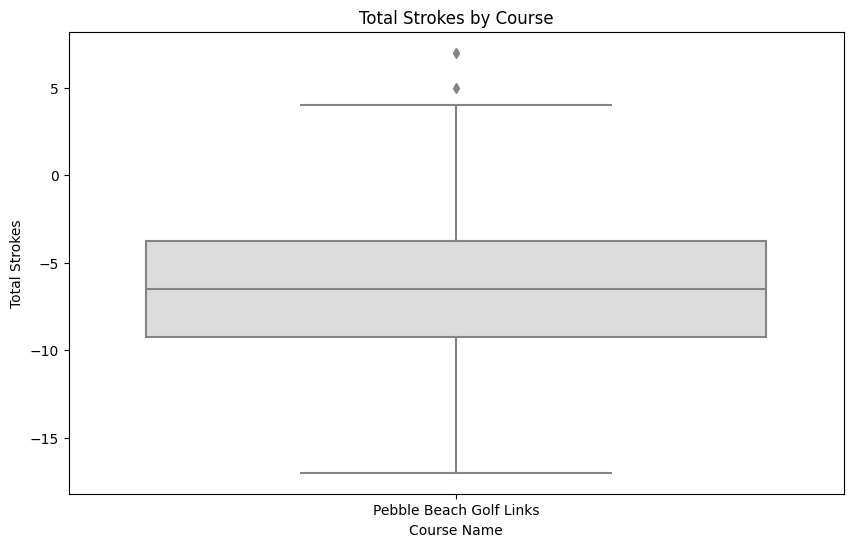

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

#Visuals
#1: Course names and total number of strokes.
#2: Seasons and crowdedness
#3: Weekdays and crowdedness
#4: Outlook (Weather) and crowdedness

#1: 

plt.figure(figsize=(10, 6))
sns.boxplot(data=LiveAPI_df, x='courseName', y='total', palette='coolwarm')
plt.title('Total Strokes by Course')
plt.xlabel('Course Name')
plt.ylabel('Total Strokes')
plt.show()


#Visual Explanation

#This visual shows the total number of strokes by course. Now the current dataframe I have made only has one course available in it right now.
#But still we are able to understand somewhat the difficulty of Pebble Beach. Since all th scores for this are from Pros only.
#One can conclude that this course is medium to high difficulty for the pros. Which would be a probable high difficulty for regular golfers.
# We can conlude this because of the average score for a pro which was 4 to 9 under par.

c:\Users\danie\.pyenv\pyenv-win\versions\3.11.9\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\danie\.pyenv\pyenv-win\versions\3.11.9\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\danie\.pyenv\pyenv-win\versions\3.11.9\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


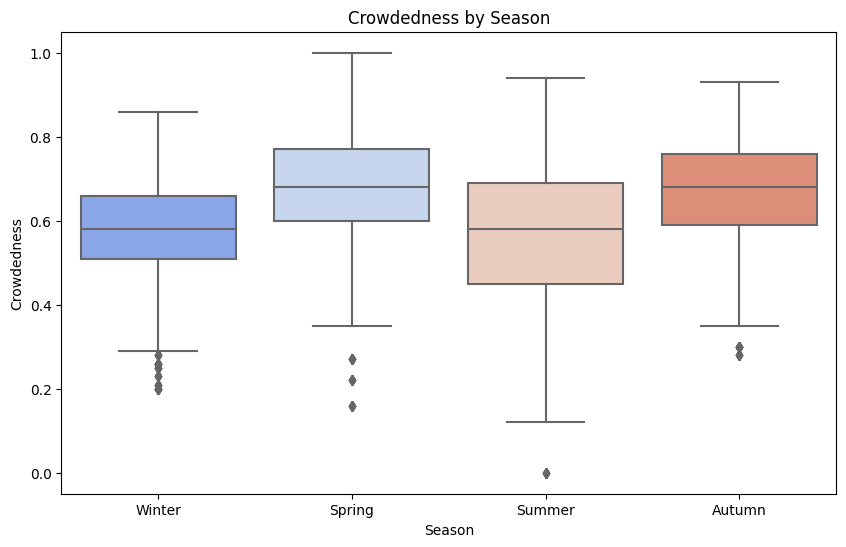

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

#Visuals
#1: Course names and total number of strokes.
#2: Seasons and crowdedness
#3: Weekdays and crowdedness
#4: Outlook (Weather) and crowdedness

#2: 

plt.figure(figsize=(10, 6))
sns.boxplot(data=golf_kaggle, x='Season', y='Crowdedness', palette='coolwarm')
plt.title('Crowdedness by Season')
plt.xlabel('Season')
plt.ylabel('Crowdedness')
plt.show()


#Visual Explanation

#This visual shows how crowded golf course may get based on the season.
#By this visual we can conclude that spring gets the most crowded, followed closely by autumn, then by summer and lastly winter.
#It is also worth noting that the box for summer is larger than the others. Showing that summer is more popular for golf in general.
#But in the day by day, spring takes the lead, then autumn. I conclude that this is because there are less good days to golf in the spring and autumn.
#But people still want to golf because of the good weather, which attracts more people in droves.

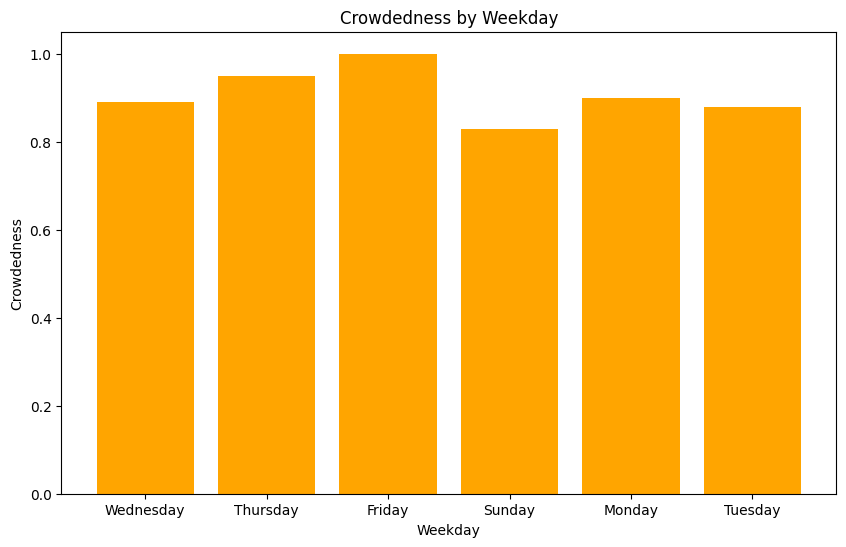

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

#Visuals
#1: Course names and total number of strokes.
#2: Seasons and crowdedness
#3: Weekdays and crowdedness
#4: Outlook (Weather) and crowdedness

#3: 
golf_kaggle_clean = golf_kaggle.dropna(subset=['Weekday', 'Crowdedness'])

plt.figure(figsize=(10, 6))
plt.bar(golf_kaggle_clean['Weekday'], golf_kaggle_clean['Crowdedness'], color='Orange')
plt.title('Crowdedness by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Crowdedness')
plt.show()


#Visual Explanation

#This visual shows crowdedness by weekdays. Which helps us see which weekdays are most popular for golf.
#We can see that Friday takes the lead with this. Probably because people get done with their work week and don't have to work the next day.
#Making it the perfect day to do an activity like golf.
#Sunday is the least crowded. Probably because of a mixture of the following. Church, sabbath, other religious observings, sports.
#And lasty sunday is the last day before the work week starts again. Which could call most to rest.

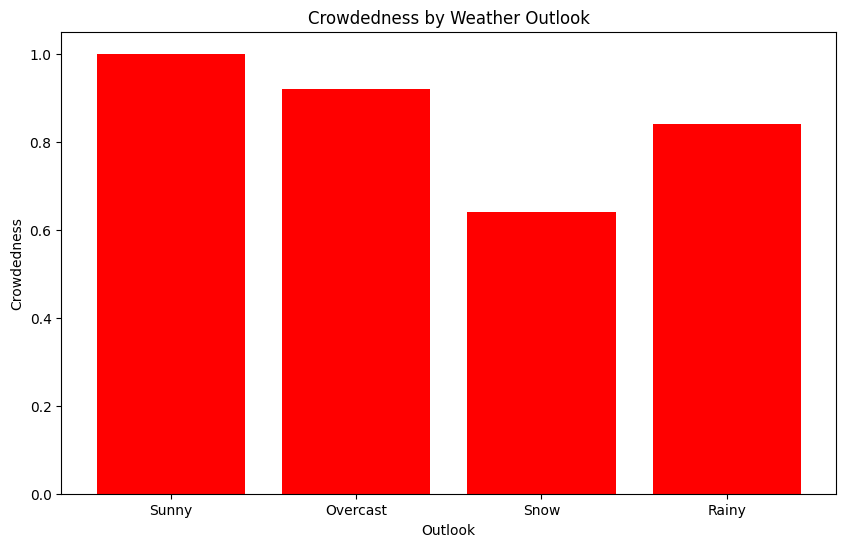

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

#Visuals
#1: Course names and total number of strokes.
#2: Seasons and crowdedness
#3: Weekdays and crowdedness
#4: Outlook (Weather) and crowdedness

#4: 
plt.figure(figsize=(10, 6))
plt.bar(golf_kaggle['Outlook'], golf_kaggle['Crowdedness'], color='Red')
plt.title('Crowdedness by Weather Outlook')
plt.xlabel('Outlook')
plt.ylabel('Crowdedness')
plt.show()


#Visual Explanation

#This visual shows crowdedness by outlook. We can see which weather outlooks are most and least popular.
#From this visual we can conclude that sunny is the most popular outlook for people to golf in.
#Then follows overcast, which is cloudy. Then rainy, and then snow. Snow is the least crowded outlook by far.

## Resources and References
*What resources and references have you used for this project?*
📝 <!-- Answer Below -->

In [57]:
# ⚠️ Make sure you run this cell at the end of your notebook before every submission!
!jupyter nbconvert --to python source.ipynb

[NbConvertApp] Converting notebook source.ipynb to python
[NbConvertApp] Writing 12294 bytes to source.py
